In [19]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:

class CovidRepository:
  # Creamos la conexión a la base de datos
  table1="location"
  table2="timeseries"
  db_url="./covid19.db"
  def __init__(self):
    self.__connection=sqlite3.connect(self.db_url)

  def getAllCO(self):
    try:
      query=f"""
            select
            substring(date,1,4)*100+substring(date,6,7)  as Fecha_Mes,
            count(id) as total_id,
            sum(confirmed) as casos_confirmados,
            sum(deaths) as Muertes,
            sum(recovered) as casos_recuperados,
            substring(date,1,4) as Anio
            from timeseries where id in (select id  from location where administrative_area_level_1 = 'Colombia')
            group by Fecha_Mes
            order by Fecha_Mes;
            """
      cursor=self.__connection.cursor()
      cursor.execute(query)
      results=cursor.fetchall()
      return results
    except Exception as e:
      print(f"Error {e}")

  def getAllCOanios(self):
    try:
      query=f"""
            select
            substring(date,1,4) as Anio,
            count(id) as total_id,
            sum(confirmed) as casos_confirmados,
            sum(deaths) as Muertes,
            sum(recovered) as casos_recuperados
            from timeseries where id in (select id  from location where administrative_area_level_1 = 'Colombia')
            group by Anio
            order by Anio;
            """
      cursor=self.__connection.cursor()
      cursor.execute(query)
      results=cursor.fetchall()
      return results
    except Exception as e:
      print(f"Error {e}")

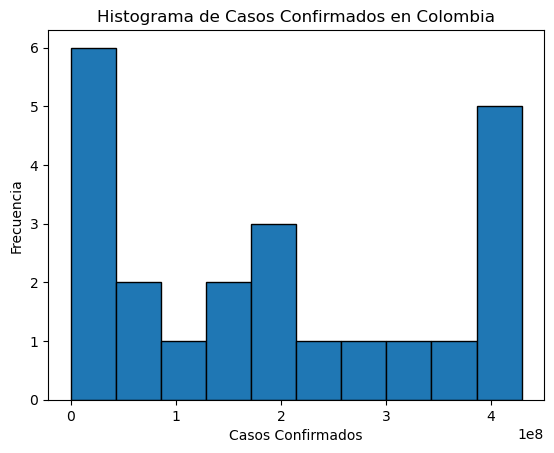

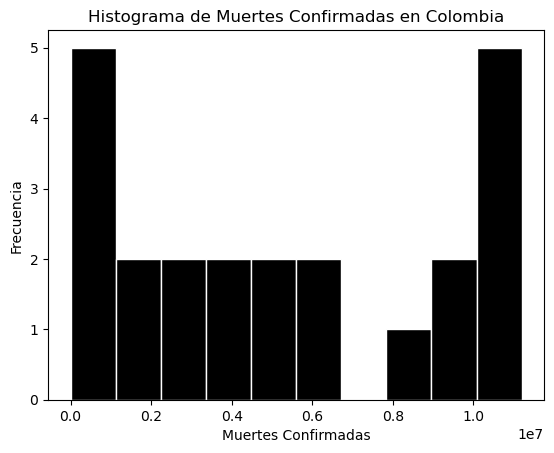

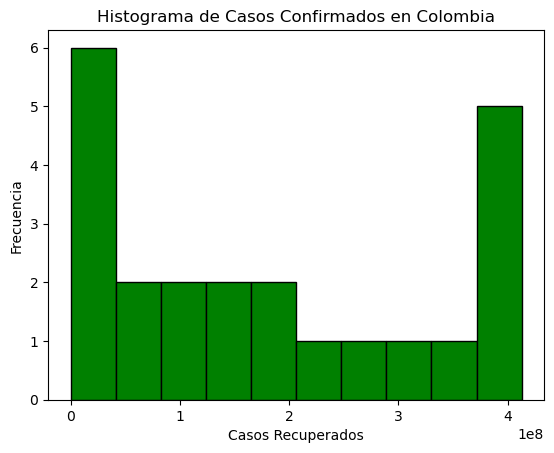

In [5]:
covid_repository=CovidRepository()
Base_Covid=covid_repository.getAllCO()
fechas_mes = [row[0] for row in Base_Covid]
casos_confirmados = [row[2] for row in Base_Covid]
Muertes_confirmadas = [row[3] for row in Base_Covid]
casos_recuperados = [row[4] for row in Base_Covid]
Anio = [row[5] for row in Base_Covid]
Anios=set(Anio)

plt.hist(casos_confirmados, edgecolor='black')
plt.xlabel('Casos Confirmados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Casos Confirmados en Colombia')
plt.show()

plt.hist(Muertes_confirmadas,color="black", edgecolor='white')
plt.xlabel('Muertes Confirmadas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Muertes Confirmadas en Colombia')
plt.show()


plt.hist(casos_recuperados, color="g",  edgecolor='black')
plt.xlabel('Casos Recuperados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Casos Confirmados en Colombia')
plt.show()

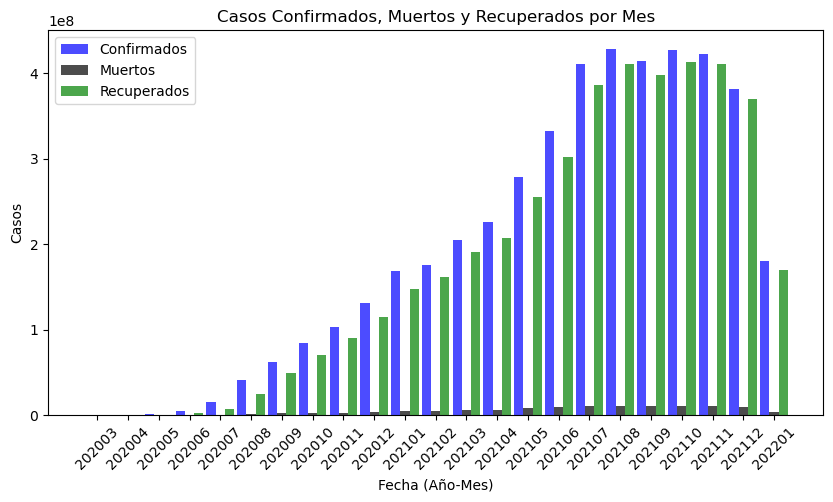

In [29]:
## Crear una única gráfica
x = np.arange(len(fechas_mes))  # Posiciones en el eje X
width = 0.3  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width, casos_confirmados, width, label="Confirmados", color='blue', alpha=0.7)
ax.bar(x, Muertes_confirmadas, width, label="Muertos", color='black', alpha=0.7)
ax.bar(x + width, casos_recuperados, width, label="Recuperados", color='green', alpha=0.7)

ax.set_xlabel("Fecha (Año-Mes)")
ax.set_ylabel("Casos")
ax.set_title("Casos Confirmados, Muertos y Recuperados por Mes")
ax.set_xticks(x)
ax.set_xticklabels(fechas_mes, rotation=45)
ax.legend()

plt.show()

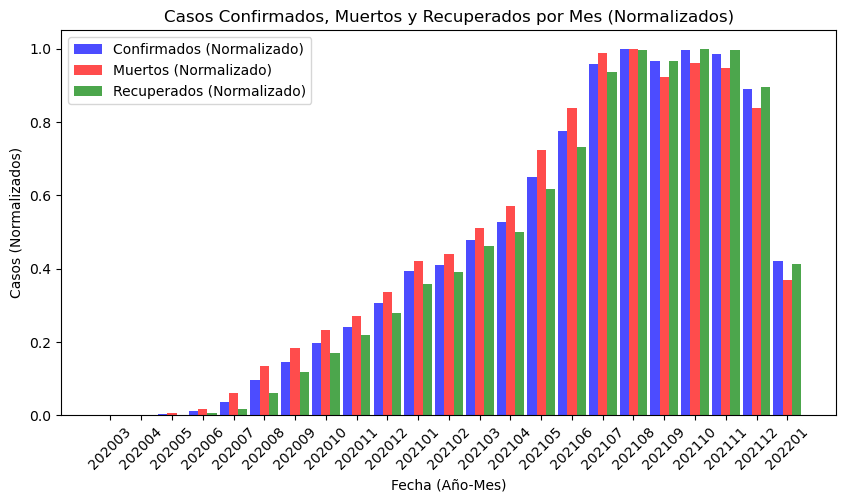

In [33]:
## Gráica Normalizada

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(np.array([casos_confirmados, Muertes_confirmadas, casos_recuperados]).T)

confirmados_norm = datos_normalizados[:, 0]
muertos_norm = datos_normalizados[:, 1]
recuperados_norm = datos_normalizados[:, 2]

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(x - width, confirmados_norm, width, label="Confirmados (Normalizado)", color='blue', alpha=0.7)
bars2 = ax.bar(x, muertos_norm, width, label="Muertos (Normalizado)", color='red', alpha=0.7)
bars3 = ax.bar(x + width, recuperados_norm, width, label="Recuperados (Normalizado)", color='green', alpha=0.7)

ax.set_xlabel("Fecha (Año-Mes)")
ax.set_ylabel("Casos (Normalizados)")
ax.set_title("Casos Confirmados, Muertos y Recuperados por Mes (Normalizados)")
ax.set_xticks(x)
ax.set_xticklabels(fechas_mes, rotation=45)
ax.legend()

# Mostrar la gráfica
plt.show()
